In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ecommerce_sales_analysis.csv")

In [3]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [4]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')


In [5]:
df.shape

(1000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [7]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [8]:
df.drop('product_name', axis=1, inplace=True)

In [9]:
df.drop('product_id', axis=1, inplace=True)

In [10]:
df.head(2)

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Clothing,190.4,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,Home & Kitchen,475.6,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353


In [11]:
df.isnull().values.any()

False

In [12]:
df.isnull().sum()

category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

📌 Qual categoria gera mais receita?
📌 Quais categorias são menos populares?
📌 Se alguma categoria tem crescimento sazonal


In [13]:
sales_by_month = df.iloc[:, 4:].sum()

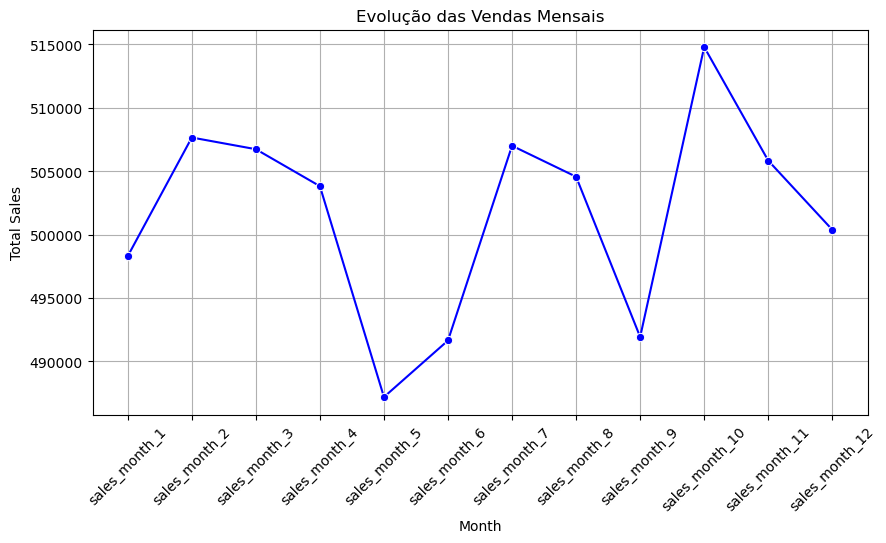

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Evolução das Vendas Mensais")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

_ organizar ideias:
    comprovar tese de que data analises ajuda com as estrategias de vendas, marketing e tomada de decisão no geral. 
    
No cenario em que eu trabalkho atualmente, os meses que mais vendem são dia dos namorados, natal etc. 

De onde vem essa informa~ção (não pode dizer que vem do Keggle)

Perguntas que quero responder:
    
    -Qual categoria que mais vendeu top 3 (em quais meses)
    -Prever vendas para os proximos 6 meses atraves de ML.
    -O quanto review impactas nas vendas (comprovar atraves de Matrix correlation)
    - Verificar melhor modelo para apresentar previsões. 
    -Algumas analises estatisticas 

1. Top 3 categorias que mais venderam (e em quais meses)

In [15]:
sales_columns = [col for col in df.columns if col.startswith('sales_month')]
df['total_sales'] = df[sales_columns].sum(axis=1)

In [16]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
print("Top 3 categorias com mais vendas:")
print(top_categories)

Top 3 categorias com mais vendas:
category
Books     938229
Toys      917101
Sports    916371
Name: total_sales, dtype: int64


<Axes: title={'center': 'Vendas mensais das top 3 categorias'}>

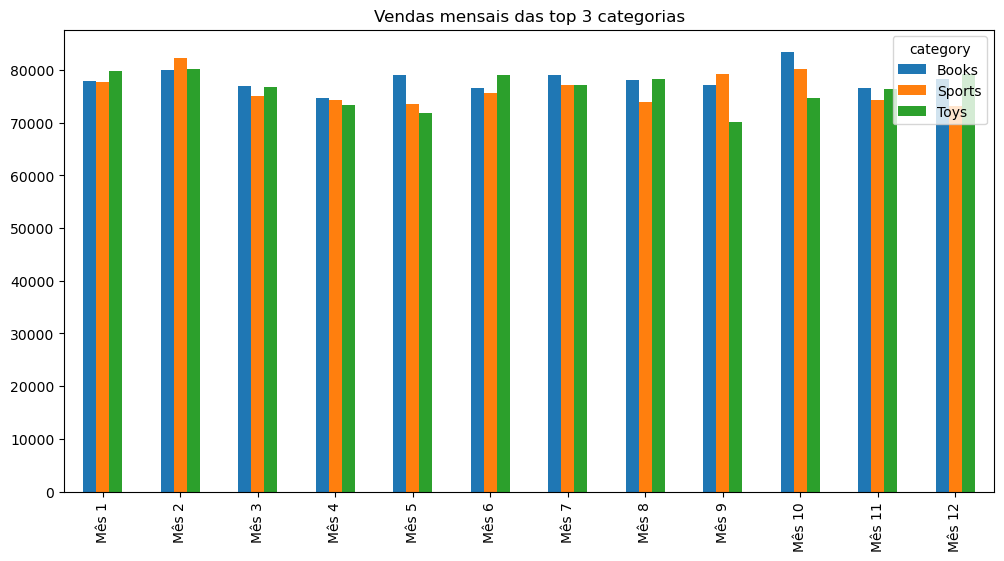

In [17]:
top_cat_df = df[df['category'].isin(top_categories.index)]

# Agrupar por categoria e mês
monthly_sales = top_cat_df.groupby('category')[sales_columns].sum().T
monthly_sales.index = [f'Mês {i+1}' for i in range(12)]

monthly_sales.plot(kind='bar', figsize=(12,6), title="Vendas mensais das top 3 categorias")

Prever vendas para os próximos 6 meses com Machine Learning

In [18]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [19]:
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [20]:
categoria = 'Books'
df_cat = df[df['category'] == categoria]

In [21]:
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]

In [22]:
monthly_sales = df_cat[sales_columns].sum().reset_index()
monthly_sales.columns = ['month', 'sales'] #somar venda por categoria 

In [23]:
monthly_sales['Date'] = pd.date_range(start='2023-01-01', periods=12, freq='MS')

In [24]:
# Criar uma cópia do DataFrame para aplicar ARIMA
df_filt = monthly_sales[['Date', 'sales']].copy()

In [25]:
# Aplicar transformação de data e index
df_filt['Date'] = pd.to_datetime(df_filt['Date'], format='%Y-%m-%d')
df_filt.index = df_filt['Date']
df_filt.drop('Date', axis=1, inplace=True)

In [26]:
df.head()

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


ADF (Augmented Dickey-Fuller) - Checking Serie 

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
result = adfuller(df_filt['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("A série é estacionária.")
else:
    print("A série NÃO é estacionária.")

ADF Statistic: -4.313016631786508
p-value: 0.00042171330391304045
A série é estacionária.


In [29]:
serie = df_filt['sales']

In [30]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(serie, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue

print(f"Melhor modelo ARIMA: {best_order} com AIC = {best_aic:.2f}")

C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

Melhor modelo ARIMA: (0, 2, 0) com AIC = 206.76


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


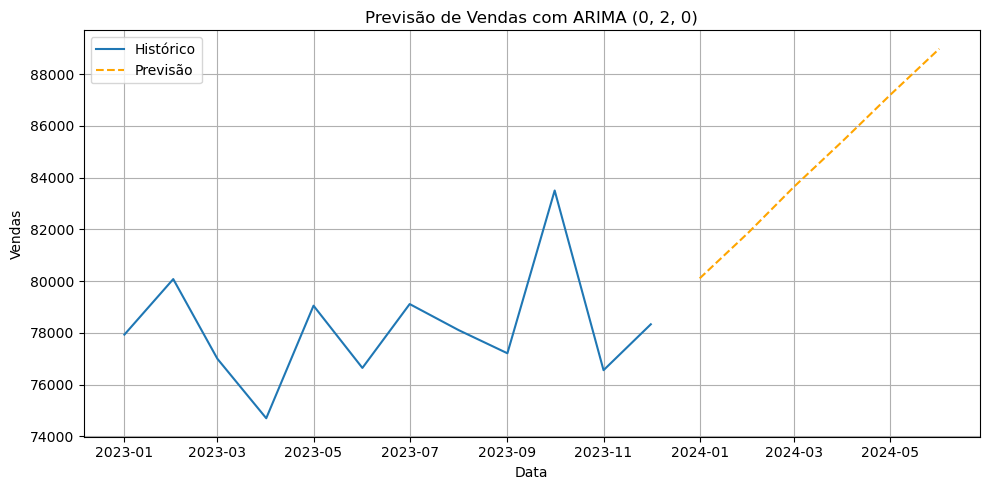

In [31]:
forecast = best_model.forecast(steps=6)
forecast_index = pd.date_range(start=serie.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(serie.index, serie, label='Histórico')
plt.plot(forecast_series.index, forecast_series.values, label='Previsão', linestyle='--', color='orange')
plt.title(f'Previsão de Vendas com ARIMA {best_order}')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
print("Vendas previstas para os próximos 6 meses:")
print(forecast_series)

Vendas previstas para os próximos 6 meses:
2024-01-01    80107.0
2024-02-01    81882.0
2024-03-01    83657.0
2024-04-01    85432.0
2024-05-01    87207.0
2024-06-01    88982.0
Freq: MS, Name: predicted_mean, dtype: float64


Previsão Top 3 

In [33]:
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)

In [34]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)

In [35]:
print("Top 3 categorias com mais vendas:")
print(top_categories)

Top 3 categorias com mais vendas:
category
Books     938229
Toys      917101
Sports    916371
Name: total_sales, dtype: int64



🛍️ Categoria: Books
 - ADF p-value: 0.0004 → Estacionária


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

 - Melhor ARIMA: (0, 0, 0) | AIC = 221.69


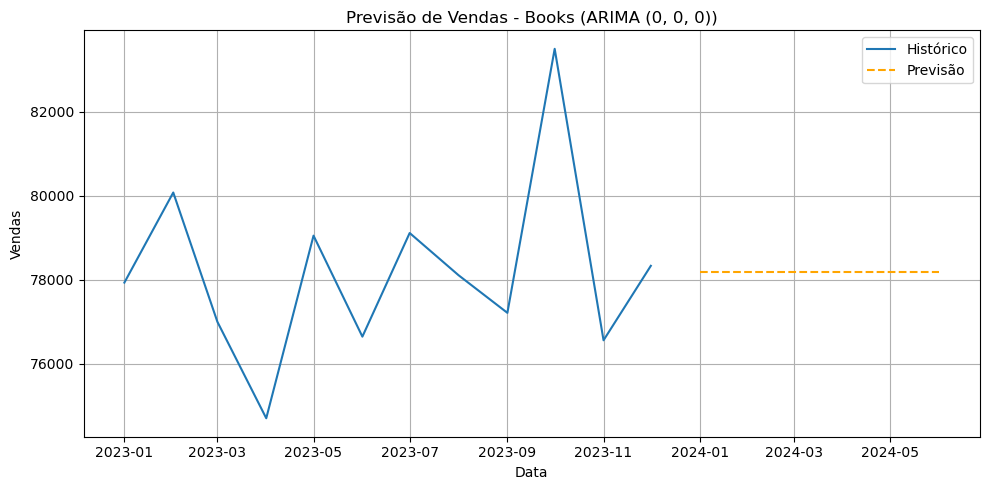


🛍️ Categoria: Toys
 - ADF p-value: 0.0019 → Estacionária


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

 - Melhor ARIMA: (2, 0, 2) | AIC = 230.63


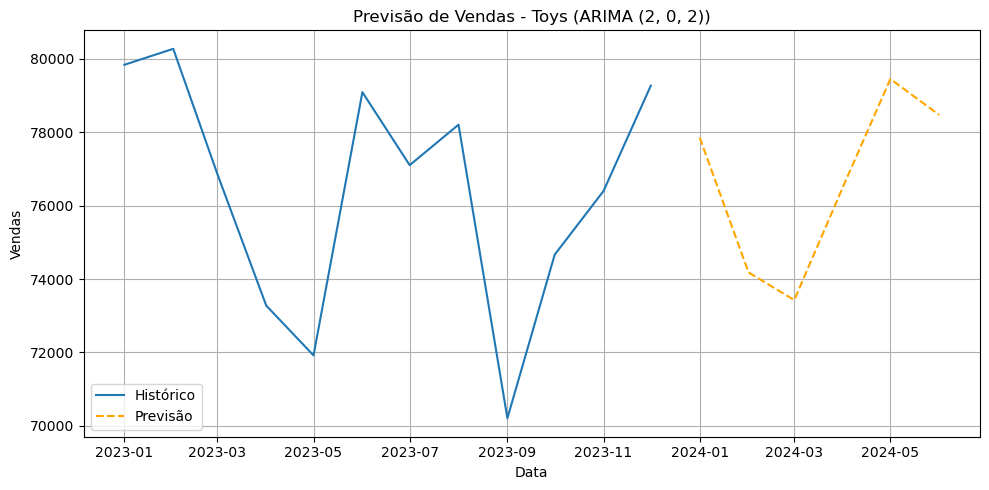


🛍️ Categoria: Sports
 - ADF p-value: 0.0065 → Estacionária


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

 - Melhor ARIMA: (0, 0, 2) | AIC = 226.34


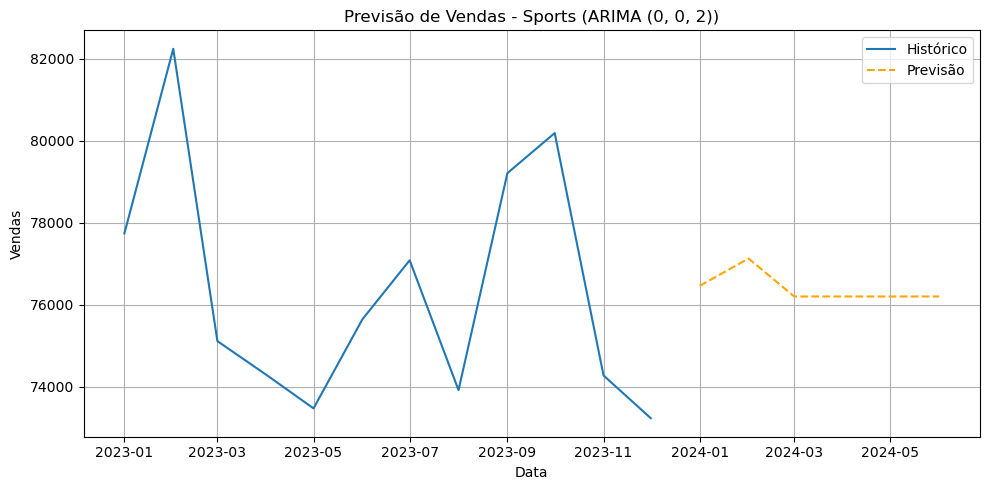

In [36]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

for categoria in top_categories.index:
    print(f"\n🛍️ Categoria: {categoria}")
    
    # 1. Filtrar e somar vendas mensais
    df_cat = df[df['category'] == categoria]
    monthly_sales = df_cat[sales_cols].sum().reset_index()
    monthly_sales.columns = ['month', 'sales']
    monthly_sales['Date'] = pd.date_range(start='2023-01-01', periods=12, freq='MS')

    df_filt = monthly_sales[['Date', 'sales']].copy()
    df_filt.set_index('Date', inplace=True)
    serie = df_filt['sales']

    # 2. Teste de estacionariedade
    adf_result = adfuller(serie)
    d = 0 if adf_result[1] < 0.05 else 1
    print(f" - ADF p-value: {adf_result[1]:.4f} → {'Estacionária' if d == 0 else 'Não Estacionária'}")

    # 3. Grid search ARIMA
    p = q = range(0, 3)
    pdq = list(itertools.product(p, [d], q))

    best_aic = np.inf
    best_order = None
    best_model = None

    for order in pdq:
        try:
            model = ARIMA(serie, order=order)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_model = results
        except:
            continue

    print(f" - Melhor ARIMA: {best_order} | AIC = {best_aic:.2f}")

    # 4. Forecast
    forecast = best_model.forecast(steps=6)
    forecast_index = pd.date_range(start=serie.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
    forecast_series = pd.Series(forecast, index=forecast_index)

    # 5. Plot
    plt.figure(figsize=(10, 5))
    plt.plot(serie.index, serie, label='Histórico')
    plt.plot(forecast_series.index, forecast_series.values, label='Previsão', linestyle='--', color='orange')
    plt.title(f'Previsão de Vendas - {categoria} (ARIMA {best_order})')
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Meses com maior volume de vendas (para cada top 3 categoria)
python
Copiar código


In [37]:
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)

top_months_dict = {}

for categoria in top_categories.index:
    df_cat = df[df['category'] == categoria]
    monthly_totals = df_cat[sales_cols].sum()
    top_months = monthly_totals.sort_values(ascending=False).head(3)
    top_month_numbers = [int(col.split('_')[-1]) for col in top_months.index]
    top_months_dict[categoria] = top_month_numbers
    print(f"\n📈 Categoria: {categoria}")
    print("Top 3 meses com mais vendas:", top_month_numbers)


📈 Categoria: Books
Top 3 meses com mais vendas: [10, 2, 7]

📈 Categoria: Toys
Top 3 meses com mais vendas: [2, 1, 12]

📈 Categoria: Sports
Top 3 meses com mais vendas: [2, 10, 9]


 Parte 2: Prever as vendas do próximo ano nesses mesmos meses usando RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

In [39]:
for categoria in top_categories.index:
    print(f"\n🔮 Previsão para categoria: {categoria}")
    top_months = top_months_dict[categoria]

    df_cat = df[df['category'] == categoria].copy()

    # Montar dataset para ML: cada linha representa um mês de uma categoria
    data = []

    for i in range(1, 13):
        for idx, row in df_cat.iterrows():
            data.append({
                'month': i,
                'price': row['price'],
                'review_score': row['review_score'],
                'review_count': row['review_count'],
                'sales': row[f'sales_month_{i}']
            })

    df_ml = pd.DataFrame(data)

    # Filtrar apenas os 3 meses mais vendidos
    df_ml = df_ml[df_ml['month'].isin(top_months)]

    # Features e target
    X = df_ml[['month', 'price', 'review_score', 'review_count']]
    y = df_ml['sales']

    # Treinar modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE no teste: {mae:.2f}")

    # Prever vendas nos mesmos 3 meses no próximo ano
    previsao = pd.DataFrame({
        'month': top_months,
        'price': [df_cat['price'].mean()] * 3,
        'review_score': [df_cat['review_score'].mean()] * 3,
        'review_count': [df_cat['review_count'].mean()] * 3
    })

    forecast = rf.predict(previsao)
    print("📅 Previsão de vendas nos top 3 meses no próximo ano:")
    for m, f in zip(top_months, forecast):
        print(f" - Mês {m}: {f:.0f} vendas")


🔮 Previsão para categoria: Books
MAE no teste: 277.68
📅 Previsão de vendas nos top 3 meses no próximo ano:
 - Mês 10: 531 vendas
 - Mês 2: 534 vendas
 - Mês 7: 551 vendas

🔮 Previsão para categoria: Toys
MAE no teste: 245.11
📅 Previsão de vendas nos top 3 meses no próximo ano:
 - Mês 2: 606 vendas
 - Mês 1: 364 vendas
 - Mês 12: 364 vendas

🔮 Previsão para categoria: Sports
MAE no teste: 288.34
📅 Previsão de vendas nos top 3 meses no próximo ano:
 - Mês 2: 477 vendas
 - Mês 10: 520 vendas
 - Mês 9: 513 vendas


In [40]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3).index


In [41]:
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
review_data = []

for categoria in top_categories:
    df_cat = df[df['category'] == categoria]
    for idx, row in df_cat.iterrows():
        for i in range(1, 13):
            review_data.append({
                'category': categoria,
                'month': i,
                'price': row['price'],
                'review_score': row['review_score'],
                'review_count': row['review_count'],
                'sales': row[f'sales_month_{i}']
            })

df_reviews = pd.DataFrame(review_data)

In [42]:
for categoria in top_categories:
    df_cat = df_reviews[df_reviews['category'] == categoria]
    corr_score = df_cat['sales'].corr(df_cat['review_score'])
    corr_count = df_cat['sales'].corr(df_cat['review_count'])
    print(f"\n📈 Categoria: {categoria}")
    print(f"Correlação (review_score vs sales): {corr_score:.2f}")
    print(f"Correlação (review_count vs sales): {corr_count:.2f}")


📈 Categoria: Books
Correlação (review_score vs sales): 0.02
Correlação (review_count vs sales): -0.01

📈 Categoria: Toys
Correlação (review_score vs sales): 0.00
Correlação (review_count vs sales): -0.03

📈 Categoria: Sports
Correlação (review_score vs sales): -0.01
Correlação (review_count vs sales): -0.03


In [43]:
#Analises estatisticas - O quanto Review impacta nos resultados de venda

Correlation

In [44]:
correlation = df[['review_score', 'review_count', 'total_sales']].corr()
print(correlation)

              review_score  review_count  total_sales
review_score      1.000000      0.027351    -0.018186
review_count      0.027351      1.000000    -0.069393
total_sales      -0.018186     -0.069393     1.000000


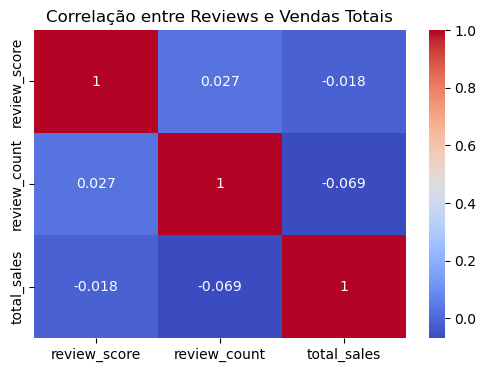

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlação entre Reviews e Vendas Totais")
plt.show()

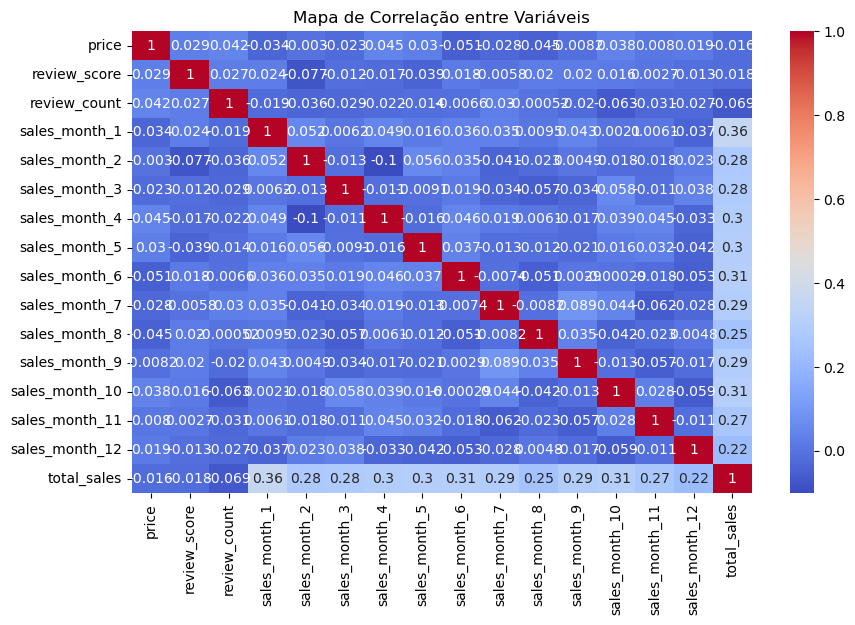

In [46]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre Variáveis")
plt.show()

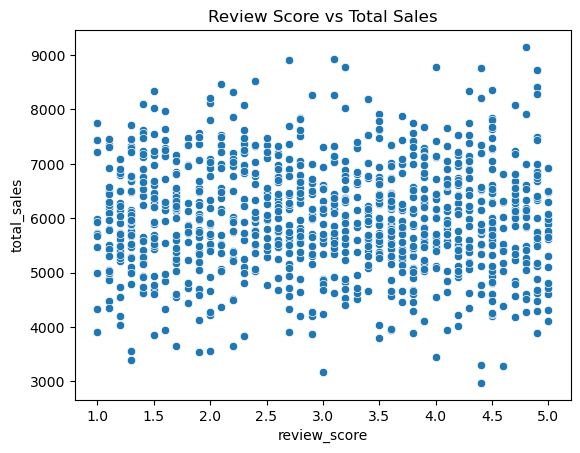

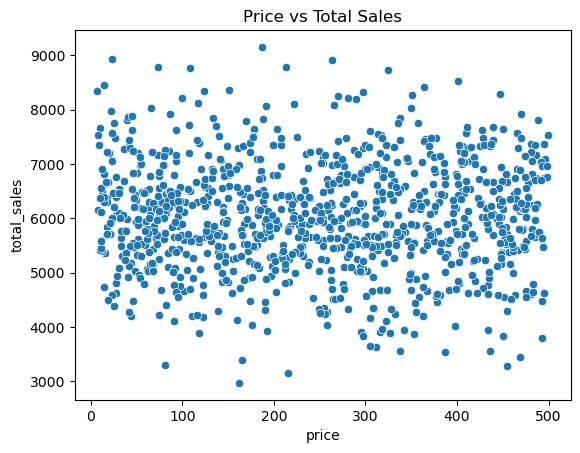

In [47]:
sns.scatterplot(data=df, x='review_score', y='total_sales')
plt.title('Review Score vs Total Sales')
plt.show()

sns.scatterplot(data=df, x='price', y='total_sales')
plt.title('Price vs Total Sales')
plt.show()

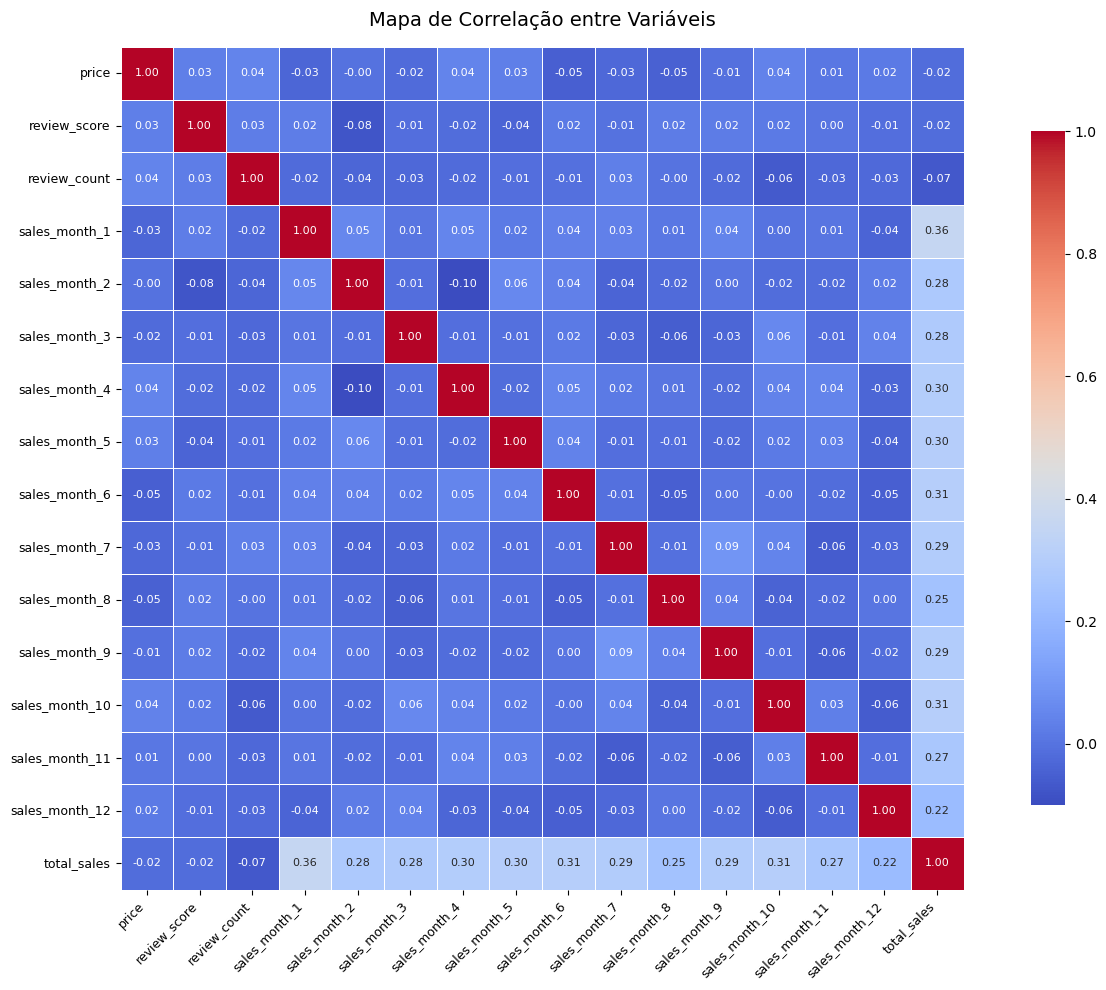

In [48]:
plt.figure(figsize=(14, 10))  # Tamanho maior para melhor leitura

# Gerando o mapa de correlação
correlation = df.corr(numeric_only=True)
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 8},  # tamanho da fonte dos valores
    cbar_kws={"shrink": 0.8},  # barra de cor menor
    square=True  # quadradinhos iguais
)

# Melhorando os rótulos
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Mapa de Correlação entre Variáveis", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [49]:
# Calcular correlação
correlation = df.corr(numeric_only=True)

# Selecionar apenas correlações com 'total_sales'
target_corr = correlation['total_sales'].drop('total_sales')  # remove a correlação de 1 com ela mesma

# Ordenar por força da correlação
target_corr = target_corr.sort_values(ascending=False)

# Imprimir análise
print("📊 Correlações com Total de Vendas:\n")
for var, corr in target_corr.items():
    impacto = ""
    if abs(corr) >= 0.5:
        impacto = "forte"
    elif abs(corr) >= 0.3:
        impacto = "moderado"
    elif abs(corr) >= 0.1:
        impacto = "fraco"
    else:
        impacto = "nenhum"
        
    sentido = "positivo" if corr > 0 else "negativo"
    
    print(f"- {var}: correlação {sentido} ({impacto}) -> coeficiente = {corr:.2f}")


📊 Correlações com Total de Vendas:

- sales_month_1: correlação positivo (moderado) -> coeficiente = 0.36
- sales_month_10: correlação positivo (moderado) -> coeficiente = 0.31
- sales_month_6: correlação positivo (moderado) -> coeficiente = 0.31
- sales_month_5: correlação positivo (moderado) -> coeficiente = 0.30
- sales_month_4: correlação positivo (fraco) -> coeficiente = 0.30
- sales_month_9: correlação positivo (fraco) -> coeficiente = 0.29
- sales_month_7: correlação positivo (fraco) -> coeficiente = 0.29
- sales_month_3: correlação positivo (fraco) -> coeficiente = 0.28
- sales_month_2: correlação positivo (fraco) -> coeficiente = 0.28
- sales_month_11: correlação positivo (fraco) -> coeficiente = 0.27
- sales_month_8: correlação positivo (fraco) -> coeficiente = 0.25
- sales_month_12: correlação positivo (fraco) -> coeficiente = 0.22
- price: correlação negativo (nenhum) -> coeficiente = -0.02
- review_score: correlação negativo (nenhum) -> coeficiente = -0.02
- review_count: 

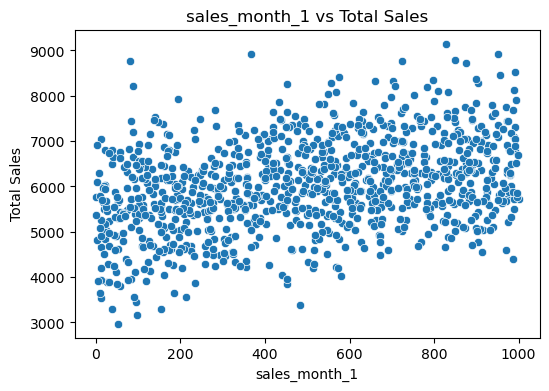

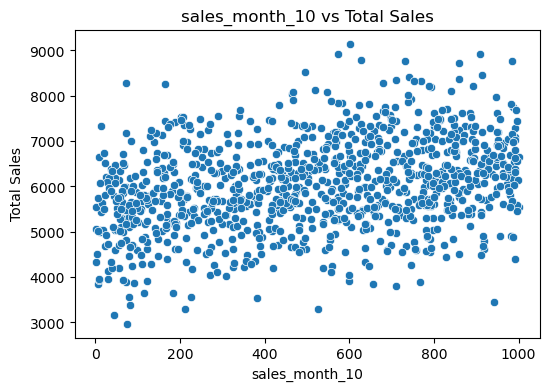

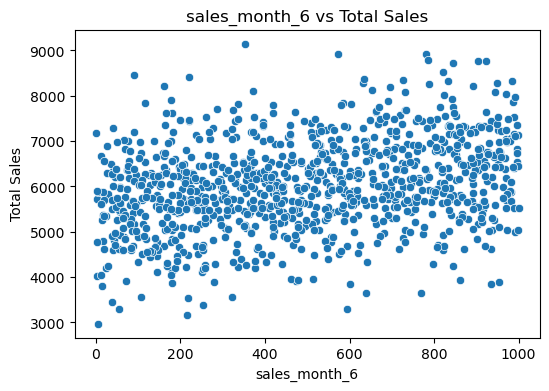

In [50]:
top_corr_vars = target_corr.abs().sort_values(ascending=False).head(3).index.tolist()

for var in top_corr_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df['total_sales'])
    plt.title(f'{var} vs Total Sales')
    plt.xlabel(var)
    plt.ylabel('Total Sales')
    plt.show()